<a href="https://colab.research.google.com/github/beyzaru/beyza/blob/main/Oztas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

In [ ]:
os.chdir("/content/drive/MyDrive")

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/beyza/var_1.csv")
df.head(5)

,Unnamed: 0,Status,Length,Left,Right,Bottom,Top,Diagonal
0,1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
1,2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
2,3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
3,4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
4,5,genuine,215.0,129.6,129.7,10.4,7.7,141.8


In [ ]:
df.shape

(200, 8)

In [ ]:
df.size

1600

In [ ]:
df.dtypes

Unnamed: 0      int64
Status         object
Length        float64
Left          float64
Right         float64
Bottom        float64
Top           float64
Diagonal      float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   Status      200 non-null    object 
 2   Length      200 non-null    float64
 3   Left        200 non-null    float64
 4   Right       200 non-null    float64
 5   Bottom      200 non-null    float64
 6   Top         200 non-null    float64
 7   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB


In [ ]:
df.keys()

Index(['Unnamed: 0', 'Status', 'Length', 'Left', 'Right', 'Bottom', 'Top',
       'Diagonal'],
      dtype='object')

In [ ]:
df.size

1600

In [ ]:
df.groupby("Status").size()

Status
counterfeit    100
genuine        100
dtype: int64

In [ ]:
df.groupby('Left').size()

Left
129.0     1
129.4     4
129.5     5
129.6    12
129.7    17
129.8     9
129.9    21
130.0    15
130.1    15
130.2    21
130.3    18
130.4    22
130.5    17
130.6    11
130.7     8
130.8     3
131.0     1
dtype: int64

In [ ]:
df.shape

(200, 8)

In [ ]:
len(df.columns)

8

In [ ]:
df.isnull().sum()

Unnamed: 0    0
Status        0
Length        0
Left          0
Right         0
Bottom        0
Top           0
Diagonal      0
dtype: int64

In [ ]:
df = df.drop (columns = ["Unnamed: 0"]) # df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
df.keys()

Index(['Status', 'Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal'], dtype='object')

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

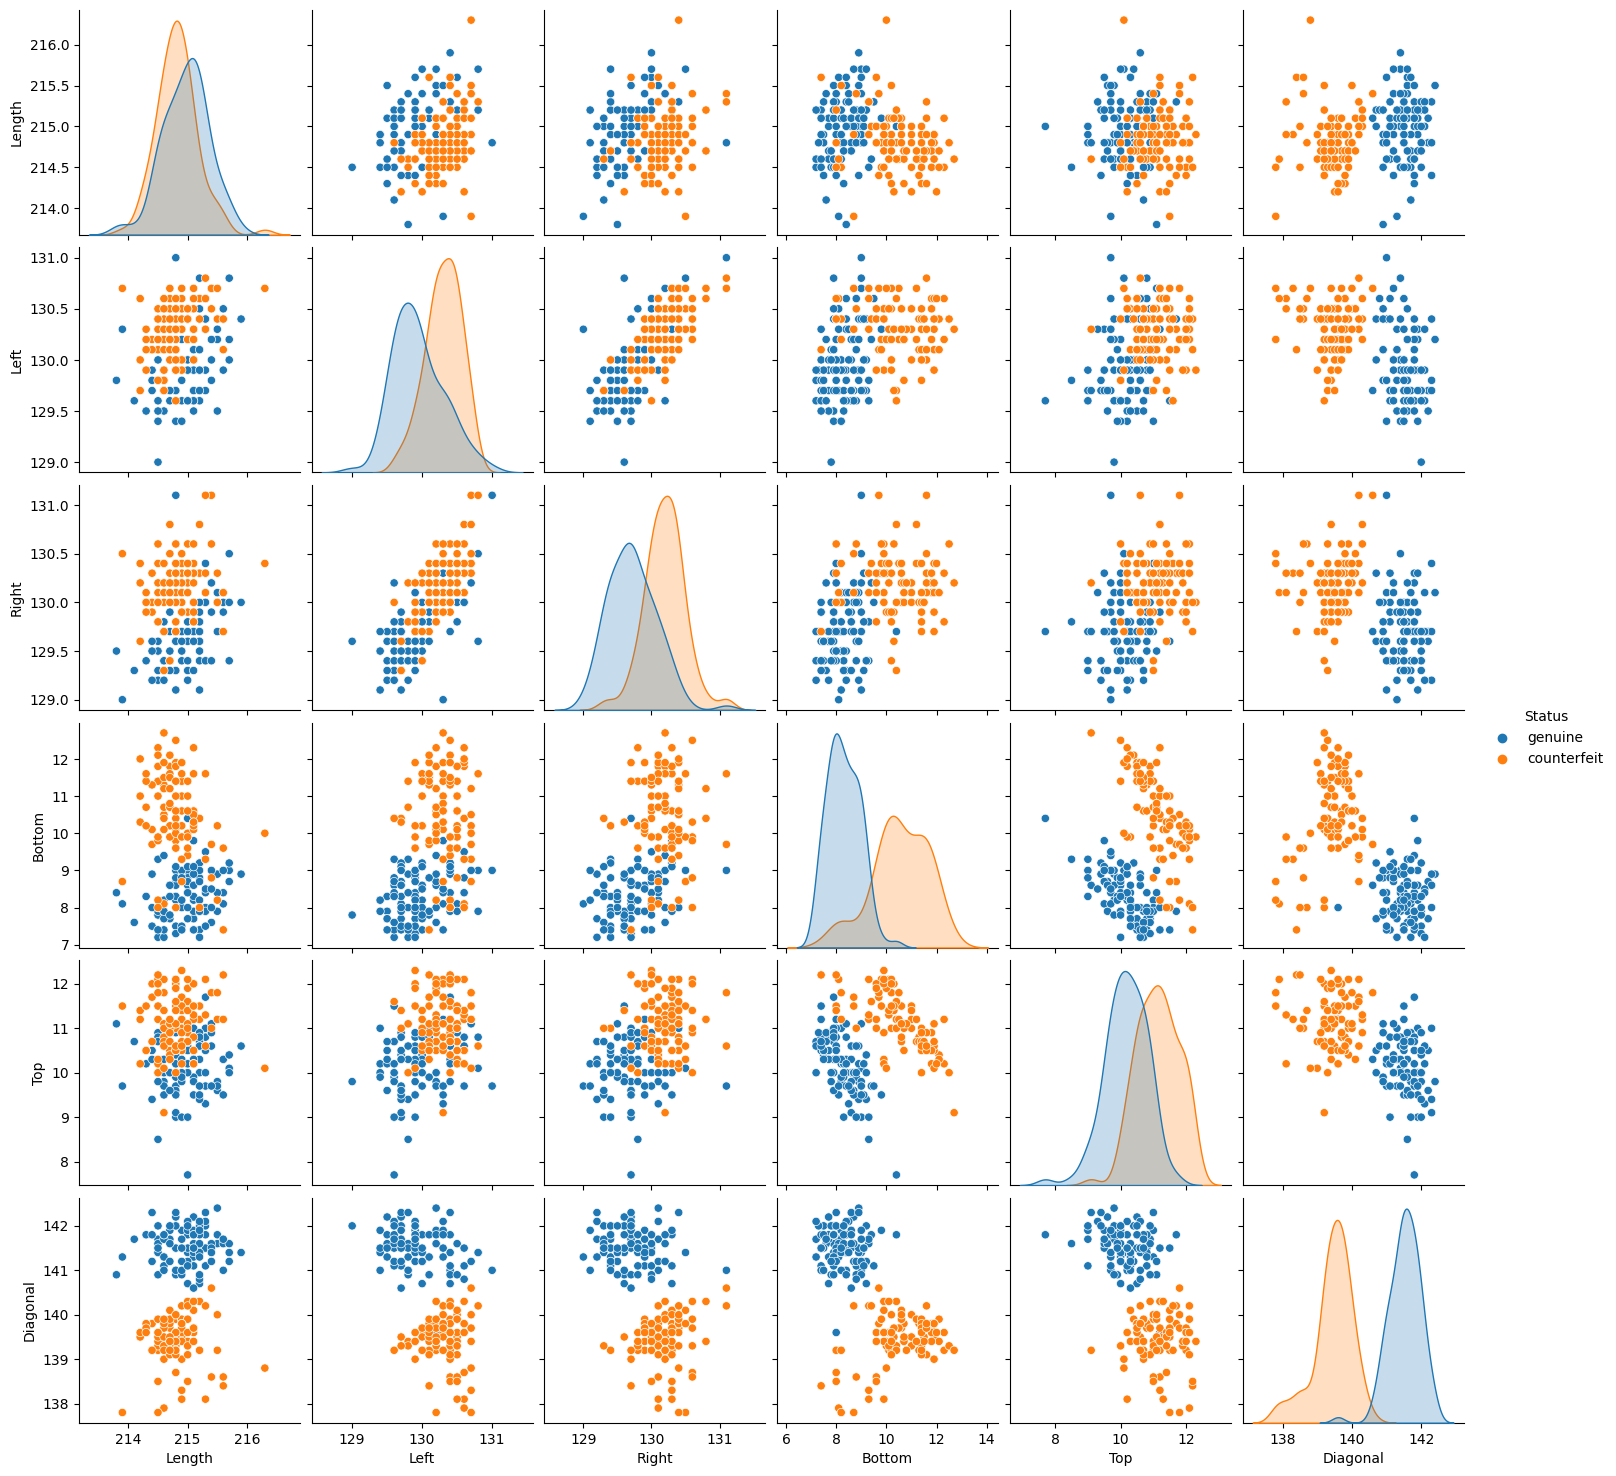

In [ ]:
sns.pairplot(df, hue = "Status")
plt.show()

2ND CHAPTER

In [ ]:
df["Status"] = df ["Status"].astype('category')

In [ ]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head(5)

,Status,Length,Left,Right,Bottom,Top,Diagonal
0,1,214.8,131.0,131.1,9.0,9.7,141.0
1,1,214.6,129.7,129.7,8.1,9.5,141.7
2,1,214.8,129.7,129.7,8.7,9.6,142.2
3,1,214.8,129.7,129.6,7.5,10.4,142.0
4,1,215.0,129.6,129.7,10.4,7.7,141.8


In [ ]:
kfold=KFold(n_splits=5, random_state=7, shuffle=True)

In [ ]:
X=df.drop(columns="Status")
Y=df["Status"]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.5,random_state=17)

In [ ]:
Y.shape

(200,)

In [ ]:
X.shape

(200, 6)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [ ]:
nb=GaussianNB()
nb_model=nb.fit(X_train,Y_train)
pred=nb_model.predict(X_test)
pred

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int8)

In [ ]:
nb_model.score(X_test,Y_test)

0.99

In [ ]:
confusion_matrix(Y_test,pred)

array([[56,  0],
       [ 1, 43]])

In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      0.98      0.99        44

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [ ]:
results = cross_val_score(nb_model, X,Y , cv = kfold, scoring = 'accuracy')
print (results.mean())

0.9949999999999999


In [ ]:
dtc= DecisionTreeClassifier()
dtc_model=dtc.fit(X_train,Y_train)
pred=dtc_model.predict(X_test)


In [ ]:
dtc_model.score(X_test,Y_test)

0.98

In [ ]:
results = cross_val_score(dtc_model, X,Y , cv = kfold, scoring = 'accuracy')
print (results.mean())

0.985


In [ ]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,Y_train)
pred=knn_model.predict(X_test)


In [ ]:
knn_model.score(X_test,Y_test)

1.0

In [ ]:
results = cross_val_score(dtc_model, X,Y , cv = kfold, scoring = 'accuracy')
print (results.mean())

In [ ]:
bc= BaggingClassifier()
bc_model=bc.fit(X_train,Y_train)
pred=bc_model.predict(X_test)
results = cross_val_score(bc, X,Y , cv = kfold, scoring = 'accuracy')
print (results.mean())

0.985


In [ ]:
rfc=RandomForestClassifier()
rfc_model=rfc.fit(X_train,Y_train)
pred=rfc_model.predict(X_test)
results = cross_val_score(rfc, X,Y , cv = kfold, scoring = 'accuracy')
print (results.mean())

0.99


In [ ]:
roc_auc_score(Y_test, pred)

0.9886363636363636

ensembles

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


In [ ]:
estimators = []
estimators.append(('lr', LogisticRegression()))
estimators.append(('dtc', DecisionTreeClassifier()))
estimators.append(('nb', GaussianNB()))

In [ ]:
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
ensemble_pred = ensemble.predict (X_test)

In [ ]:
precision_score(Y_test, ensemble_pred)

1.0

In [ ]:
results=cross_val_score(ensemble,X,Y,cv=kfold,scoring="accuracy")
print(results.mean())

0.9949999999999999


In [ ]:
#the second variant
model= BaggingClassifier(base_estimator=dtc_model,n_estimators=100,random_state=7)
results=cross_val_score(model,X,Y,cv=kfold,scoring="accuracy")
print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.985


In [ ]:
model = XGBClassifier(n_estimators = 100)
results = cross_val_score(model,X, Y, scoring='roc_auc', cv=3)
print(results.mean())

0.9894533571004159


In [ ]:
model=RandomForestClassifier(n_estimators=100,max_features=4)
results=cross_val_score(model,X,Y,cv=kfold,scoring="accuracy")
print(results.mean())

0.99


In [ ]:
model=AdaBoostClassifier(n_estimators=100,random_state=7)
results=cross_val_score(model,X,Y,cv=kfold,scoring="accuracy")
print(results.mean())

0.99


In [ ]:
meta=XGBClassifier(seed = 7, n_estimators = 100, max_depth = 6, learning_rate = 0.3)

In [ ]:
from sklearn.svm import SVC
meta_mtrx=np.empty((Y.shape[0],len(models)))
train,valid, train_true, valid_true = train_test_split(X_train, Y_train,
                                                       train_size = 0.2,
                                                       random_state = 17)

In [ ]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
nb = GaussianNB()
svc=SVC()
models = [knn, lr, dtc,nb,svc]
from sklearn.model_selection import cross_val_predict, cross_val_score
meta_alg = XGBClassifier(seed = 7, n_estimators = 100, max_depth = 6, learning_rate = 0.3)

In [ ]:
meta_mtrx = np.empty((df.shape[0], len(models)))
meta_model = meta_alg.fit(meta_mtrx, df['Status'])

In [ ]:
for n, model in enumerate(models):
  meta_mtrx[:, n] = cross_val_predict(model, X,
Y, cv=5, method='predict')
  base_algorithm = model.fit(X_train, Y_train)
  predicted = model.predict(X_train)
  print(accuracy_score(Y_test,predicted))


0.54
0.54
0.54
0.54
0.44


In [ ]:
meta_predict = meta_alg.predict(meta_mtrx_test)
precision_score(df['Status'], meta_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
model = XGBClassifier(seed = 7, n_estimators = 100, max_depth = 6, learning_rate = 0.3)
results = cross_val_score(model,X,Y, scoring='roc_auc', cv=3)
print(results.mean())

0.9894533571004159


In [ ]:
estimators.append(('lr', LogisticRegression()))
estimators.append(('dt', DecisionTreeClassifier()))
estimators.append(('nb', GaussianNB()))
estimators.append(('svc', SVC()))
estimators.append(('knn', KNeighborsClassifier()))
models = [knn, lr, dtc,nb,svc]
estimators = []

In [ ]:

ensemble=VotingClassifier(estimators)
ensemble
results=cross_val_score(ensemble,X,Y,cv=kfold,scoring="accuracy")
print(results.mean())

0.99


In [ ]:
train,valid, train_true, valid_true = train_test_split(X_train, Y_train,
                                                       train_size = 0.2,
                                                       random_state = 17)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
knn = KNeighborsClassifier().fit(train,train_true)
lr = LogisticRegression().fit(train,train_true)
dtc = DecisionTreeClassifier().fit(train,train_true)
nb = GaussianNB().fit(train,train_true)
svc = SVC().fit(train,train_true)
models = [knn,lr,dtc,svc,nb]

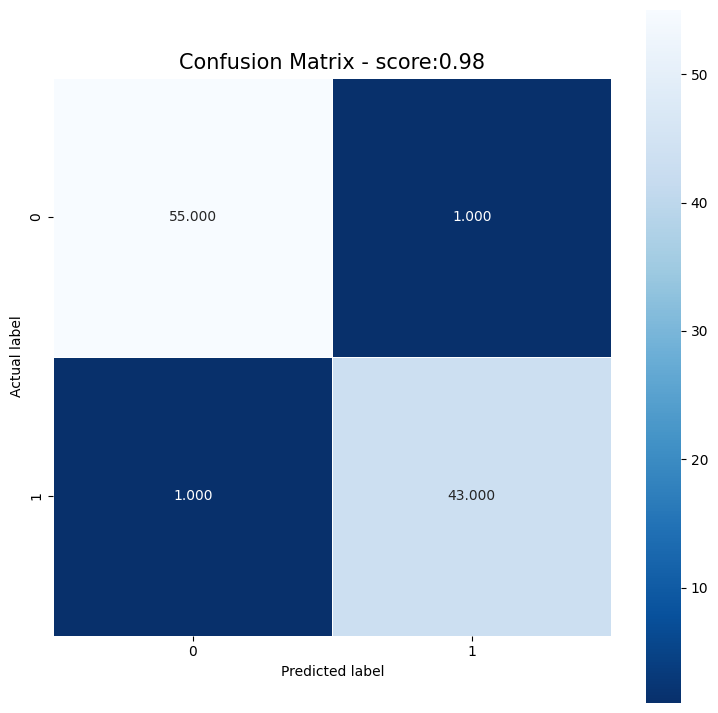

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.98      0.98      0.98        44

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [ ]:
model=GradientBoostingClassifier(random_state=0,learning_rate=0.3,n_estimators=100)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(Y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(Y_test,y_pred))

In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      0.98      0.99        44

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

